In [1]:
import numpy as np

In [3]:
b2 = np.array([ [3, -3], [4, -5] ])

In [4]:

b2_inv = np.linalg.inv(b2)

In [5]:
b2_inv

array([[ 1.66666667, -1.        ],
       [ 1.33333333, -1.        ]])

In [7]:
v1 = np.array([3,2])

In [8]:
b2_inv@v1

array([3., 2.])

## PCA using Python

In [2]:
import pandas as pd

In [11]:
data = pd.read_csv("Iris.csv")

In [12]:
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data['petal width'].var()

0.5824143176733784

In [15]:
data['petal width'].max()

2.5

In [16]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### scaling the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
x =  data.copy()

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
idx = x.iris[(x.iris.map(lambda a: isinstance(a, float)) == False)]
print (idx)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: iris, Length: 150, dtype: object


In [26]:
#remove non integer rows
x[pd.to_numeric(x['iris'], errors='coerce').notnull()]

,sepal length,sepal width,petal length,petal width,iris


In [29]:
x = x.drop('iris', axis=1)

In [30]:
x = scaler.fit_transform(x)

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(random_state=10)

In [33]:
pca.fit(x)

PCA(random_state=10)

In [34]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [35]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

First two explain 95% of data

In [37]:
var_cummu = np.cumsum(pca.explained_variance_ratio_)

In [43]:
import matplotlib.pyplot as plt

### Scree plot

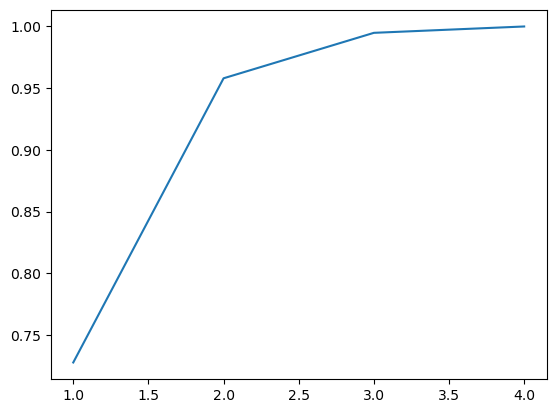

In [46]:
plt.plot(range(1, len(var_cummu)+1), var_cummu)

# practice question

In [3]:
rating = pd.read_csv('Ratings.csv')

In [4]:
rating.head()

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(random_state=10)

In [11]:
pca.fit_transform(rating)

array([[ 4.32763697, -0.86510265,  1.26638799,  0.0192282 , -0.02607712],
       [ 0.75438474, -1.25497871, -1.33150365, -0.55425185,  0.01802273],
       [-0.96124411, -0.95065343, -0.92645456,  1.11904645,  0.02145516],
       [-2.60315862, -0.01942434, -0.29100855, -0.88741404, -0.0637141 ],
       [ 1.47485205,  2.1797347 , -0.78910935,  0.6237979 , -0.0229388 ],
       [ 0.09908771,  1.04243975,  0.45272116, -0.88071865,  0.06717028],
       [-3.09155875, -0.13201534,  1.61896695,  0.56031199,  0.00608186]])

In [13]:
pca.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])